# Syllables Analysis & Derégnaucourt replication

This notebook contains statistical analyses done by Derégnaucourt et al. (2005). Our goal is to reproduce the results of this paper.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from copy import deepcopy
from os.path import join, isdir
import json
import pandas as pd
import pickle
from scipy.io import wavfile
from syllable_cluster import *

from ipywidgets.widgets import FloatProgress
from IPython.display import display

import sys

sys.path.append('../model')

from song_model import SongModel

sns.set_palette('colorblind')
%matplotlib inline

In [24]:

progress = FloatProgress(min=0, max=1)
display(progress)
main_path = '../model/res/microbial_uniform_170503_155818/seed{}+big_ba+on_alpha_silence_beta+prior_amp_entropy+slow_dev+20_replay+10_conc+3_day_conc/'
all_dat = []

for seed in range(40):
    if not  isdir(main_path.format(seed)):
        #print(seed)
        continue
    path = main_path.format(seed)
    cur_dat = syllables_from_run(path, force=False, progress=progress)
    cur_dat['bird'] = seed
    all_dat.append(cur_dat)
    seed += 1
all_dat = pd.concat(all_dat)

sr, tutor = wavfile.read(join(main_path.format(0), 'tutor.wav'))
tutor_syllables = extract_syllables_statistics(tutor)

In [25]:
first_day = 5
last_day = first_day + 5
beg = tutor_syllables[0]['beg'] - 50
end = tutor_syllables[0]['end'] + 50
plot_dat = all_dat.query("((bird == {bird}) and ( \
                         (beg > {beg} and end < {end}) and day % 10 == 0))".format(
    first_day=first_day,
    last_day=last_day,
    bird=0,
    beg=tutor_syllables[0]['beg'] - 50,
    end=tutor_syllables[0]['end'] + 50
))
tutor_df = pd.DataFrame(tutor_syllables)
tutor_df['day'] = 100
plot_dat = pd.concat((plot_dat, tutor_df.query("beg > {beg} and end < {end}".format(beg=beg, end=end))))
plot_dat

,beg,bird,comb,day,end,isong,isyb,length,mam,mamplitude,...,mgoodness,moment,mpitch,run_name,vam,vamplitude,ventropy,vfm,vgoodness,vpitch
666,124,0.0,10.0,10,194,0.0,0,70,-0.000117,-2.342433,...,-1.607837,morning,-2.055691,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.030708,1.335766,0.633528,2.209713,1.904817,5.801273
676,125,0.0,10.0,10,172,1.0,0,47,-0.000138,-1.576573,...,-1.284214,morning,-0.693570,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.057198,0.478835,0.232939,1.968356,1.210512,1.480068
686,124,0.0,10.0,10,194,2.0,0,70,-0.000119,-2.518709,...,-1.610036,morning,-2.055692,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.018148,1.335764,0.633528,2.210527,1.900106,5.801272
697,124,0.0,10.5,10,194,0.0,1,70,-0.000118,-2.433087,...,-1.682250,evening,-1.338125,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.113590,2.045959,0.543601,2.604629,1.250917,9.010071
706,125,0.0,10.5,10,171,1.0,0,46,0.000015,-1.722276,...,-1.320500,evening,-0.725034,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.033287,0.402757,0.232039,1.918756,1.232412,1.466723
715,124,0.0,10.5,10,167,2.0,0,43,-0.000115,-2.162356,...,-1.914607,evening,-0.863383,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.033118,1.108791,0.122965,2.672474,0.538710,2.249791
716,168,0.0,10.5,10,194,2.0,1,26,-0.000095,-3.671211,...,-3.016009,evening,-5.143442,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.000239,0.272288,0.242928,3.601505,0.822822,1.651300
1286,124,0.0,20.0,20,163,0.0,0,39,-0.000051,-2.156795,...,-1.534790,morning,-0.599718,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.038164,0.916574,0.408510,2.480217,0.521914,0.886388
1296,124,0.0,20.0,20,164,1.0,0,40,-0.000096,-2.223204,...,-1.498179,morning,-0.555804,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.037210,1.065654,0.416584,2.497015,0.561230,0.939437
1297,182,0.0,20.0,20,198,1.0,1,16,0.000236,-4.675794,...,-2.233239,morning,-5.395940,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0.000008,0.002625,0.031640,0.004284,0.073252,0.000022


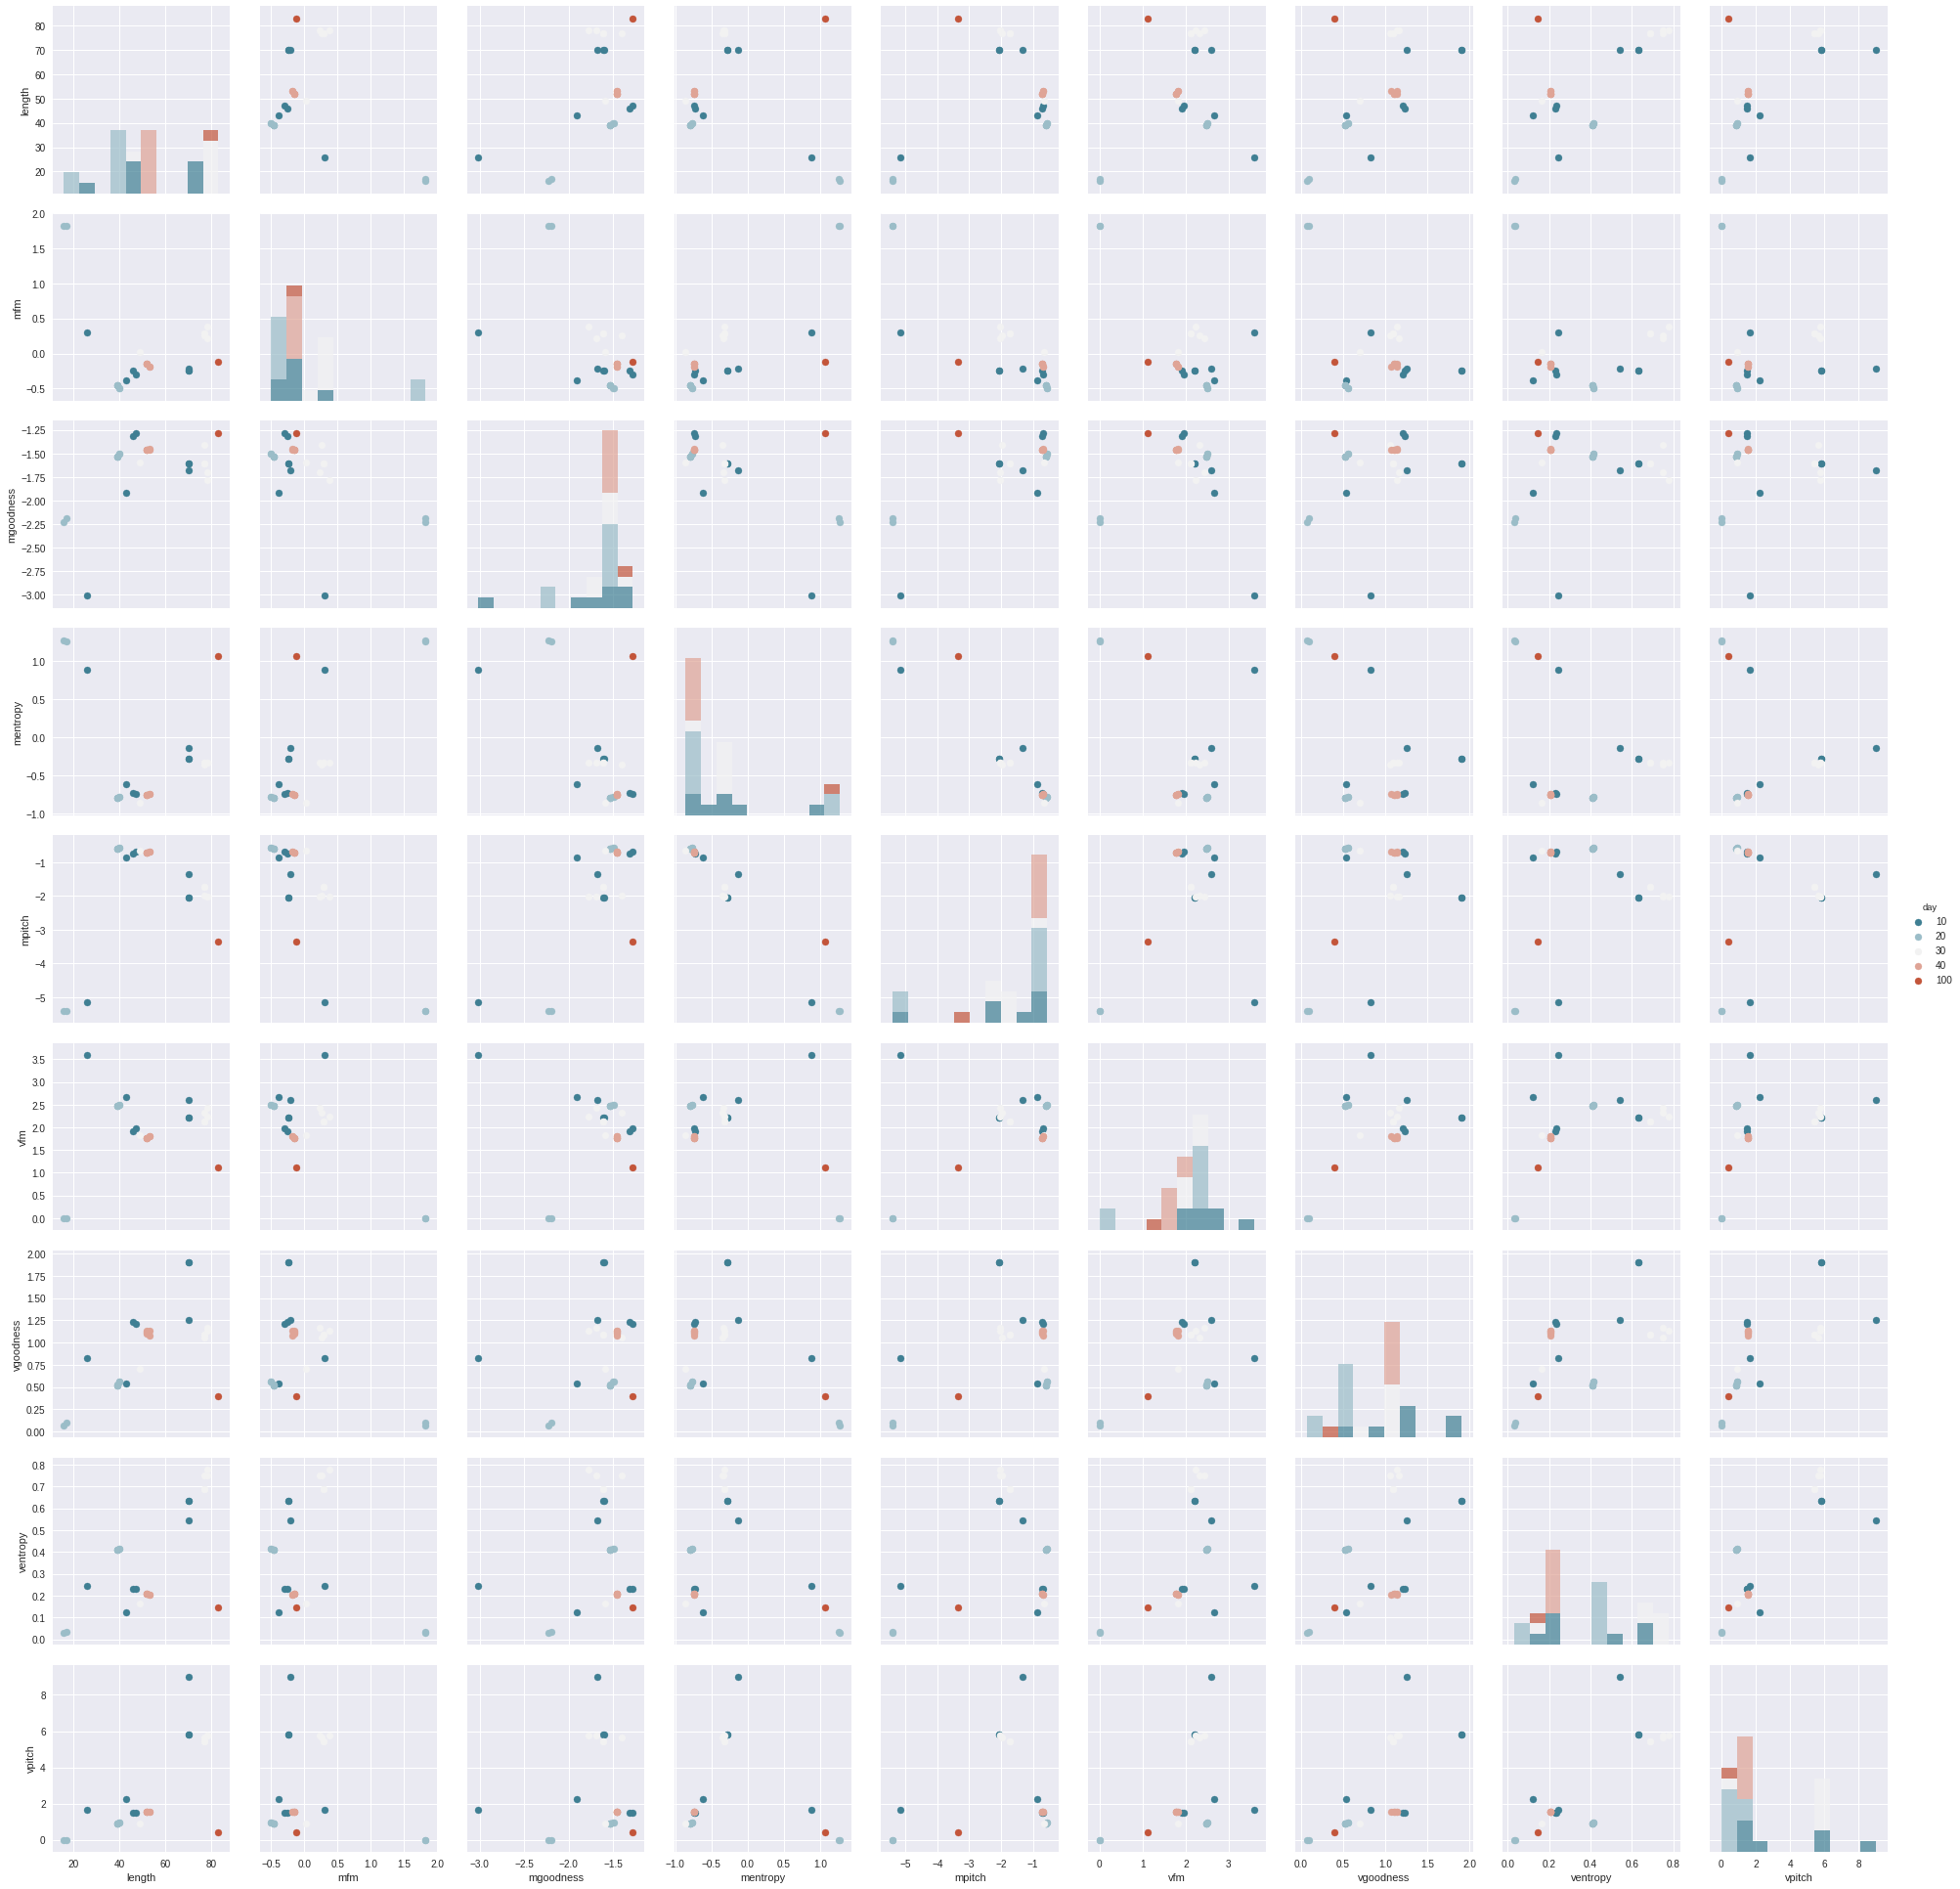

In [26]:
g = sns.PairGrid(plot_dat, hue="day", vars=['length', 'mfm', 'mgoodness', 'mentropy', 'mpitch',
                                            'vfm', 'vgoodness', 'ventropy', 'vpitch'], size=3, palette=sns.diverging_palette(220, 20, n=5))
g.map_diag(plt.hist, alpha=0.7)
g.map_offdiag(plt.scatter, alpha=1)
#g.map_offdiag(sns.kdeplot, alpha=0.3)
g.add_legend()


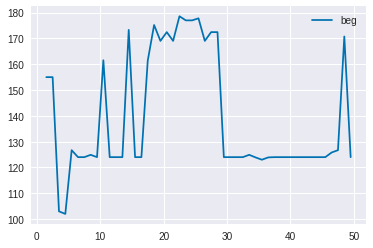

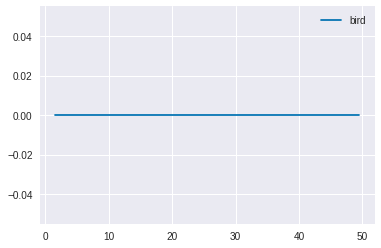

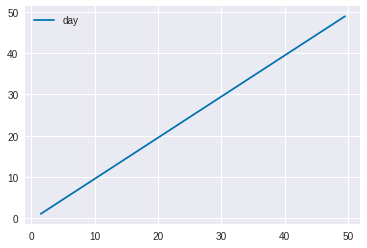

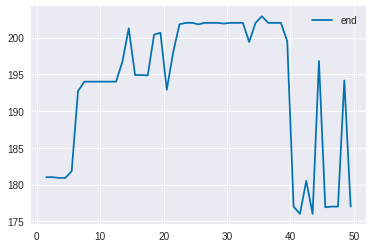

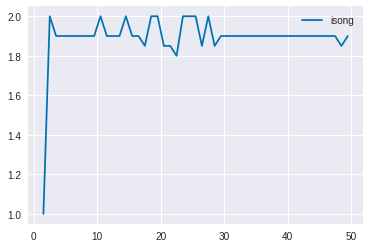

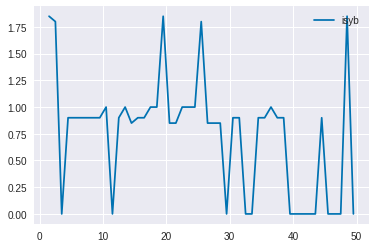

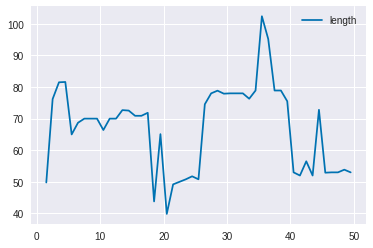

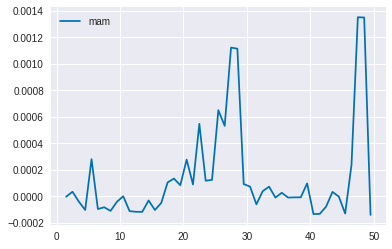

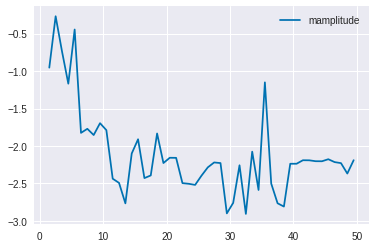

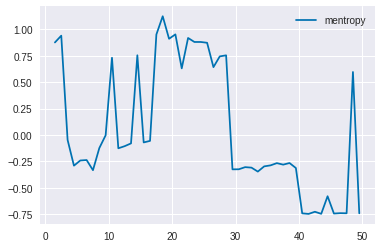

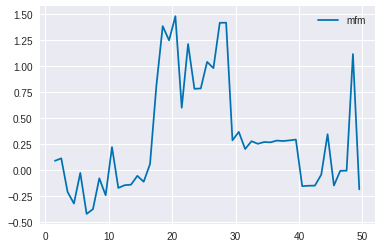

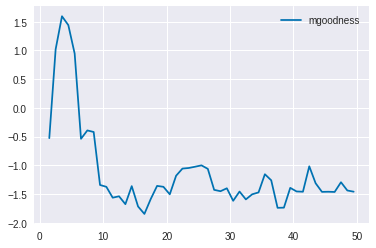

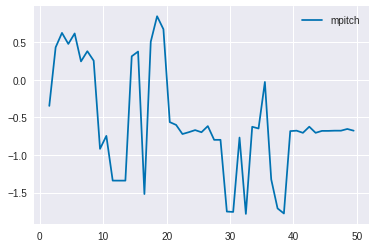

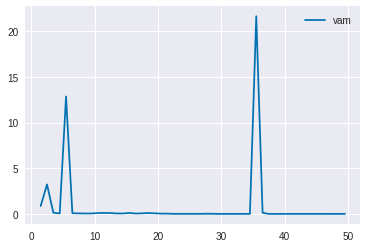

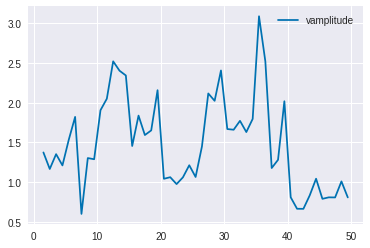

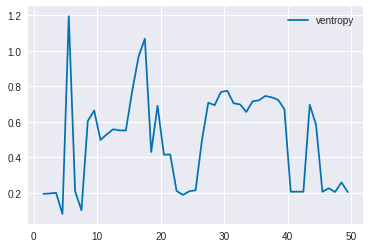

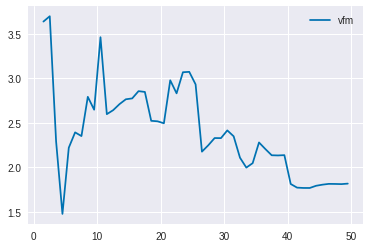

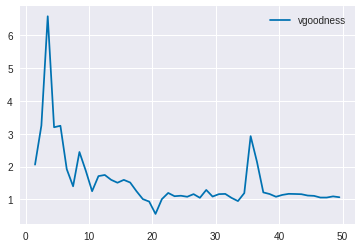

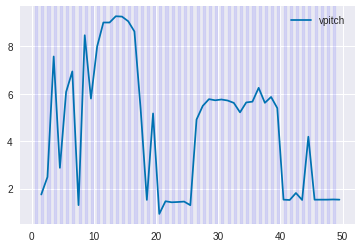

In [86]:
plt.figure(figsize=(14, 14))
med = all_dat.query('beg > {beg} and end < {end} and moment == "evening"'.format(
    beg=tutor_syllables[0]['beg'] - 50,
    end=tutor_syllables[0]['end'] + 50)).groupby('comb').quantile(0.95)
for item in med.keys():
    plt.figure()
    plt.plot(med[item], label=item)
    plt.legend()
for day in range(np.max(all_dat['day'])):
    plt.axvspan(day+0.5, day+1, color='b', alpha=0.1)

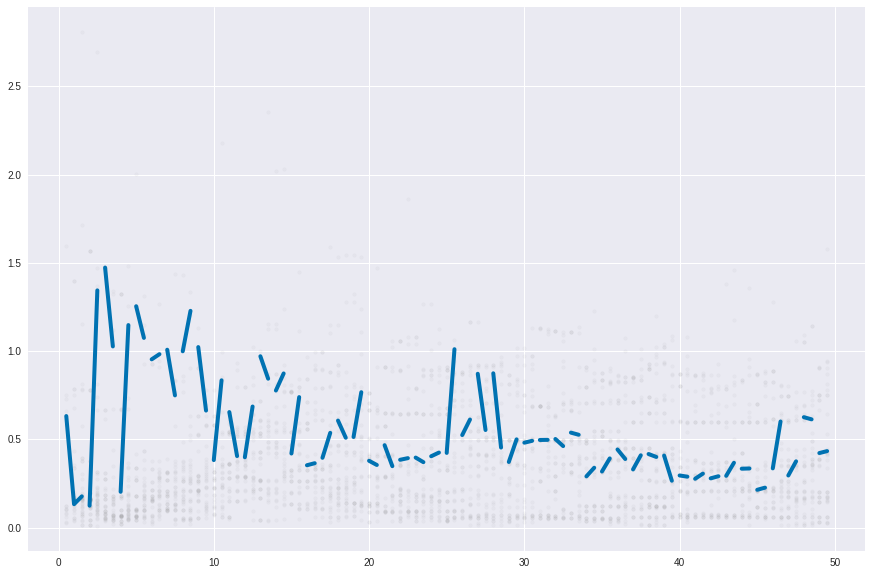

In [87]:
plt.figure(figsize=(15, 10))

feat = 'ventropy'

splitted = all_dat[all_dat.isyb == 3].groupby('comb')[feat].quantile(0.95)
for i in splitted.index:
    if i % 1 == 0:
        splitted.set_value(i + 0.75, np.nan)
splitted.sort_index(inplace=True)


plt.scatter(all_dat['comb'], all_dat[feat], marker='.', alpha=0.05, color="grey")
plt.plot(splitted, linewidth=4)

(-50, 50)

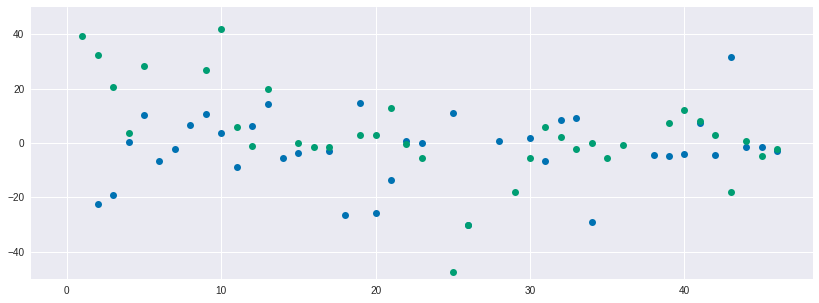

In [88]:
means = []
for day in range(1, np.max(all_dat['day']) - 1):
    last_day = all_dat[((all_dat.day == np.max(all_dat['day'])) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day + 1) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night, last_day)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means.append(mean)
means = np.array(means)


means_sd = [] # means same day
for day in range(1, np.max(all_dat['day']) - 1):
    last_day = all_dat[((all_dat.day == np.max(all_dat['day'])) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night, last_day)
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means_sd.append(mean)
means_sd = np.array(means_sd)

plt.figure(figsize=(14, 5))
plt.plot(means, 'o')
plt.plot(means_sd, 'o')
plt.ylim((-50,50))

In [89]:
all_dat

,beg,comb,day,end,isong,isyb,length,mam,mamplitude,mentropy,...,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch,run_name,bird
0,379,0.5,0,438,0,0,59,-0.000007,-0.755652,-1.273874,...,evening,-0.530093,4.504799e-01,0.423866,0.754156,1.724994,3.151683,1.225381e+00,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
1,491,0.5,0,514,0,1,23,-0.000202,-2.463543,0.918221,...,evening,0.846279,6.169997e-03,0.072214,0.120979,3.493896,0.260470,5.361895e-07,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
2,606,0.5,0,627,0,2,21,0.000404,-2.699659,-1.001984,...,evening,0.282805,2.047096e-03,0.025967,0.103868,2.896001,1.724632,7.876385e-04,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
3,641,0.5,0,682,0,3,41,-0.001144,-2.006934,0.073482,...,evening,0.169108,9.215729e-03,0.244202,0.121313,1.668326,1.351036,3.353496e+00,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
4,715,0.5,0,793,0,4,78,-0.000165,0.126068,-0.398154,...,evening,0.591539,2.323035e+00,0.515744,0.085803,1.603408,2.175858,8.334958e-01,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
5,881,0.5,0,1017,0,5,136,-0.000100,0.020285,-1.498794,...,evening,0.604596,1.107873e+00,0.340223,1.598304,1.819512,11.714334,5.472348e-01,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
6,1387,0.5,0,1462,0,6,75,-0.000088,-0.974099,-0.485757,...,evening,0.621072,7.476381e-02,0.446372,0.101957,1.493746,5.098242,9.283158e-01,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
7,244,0.5,0,284,1,0,40,-0.018031,-1.015918,-0.406725,...,evening,0.769941,6.660970e-02,0.053099,0.030828,1.565895,0.777182,5.013497e-04,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
8,941,0.5,0,1016,1,1,75,-0.002302,-0.028960,-0.375176,...,evening,0.764705,1.155247e+00,0.120973,0.060962,1.303619,3.689200,1.721486e-04,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
9,1108,0.5,0,1180,1,2,72,0.000934,-0.068866,-0.619244,...,evening,0.770761,7.038622e-01,0.170087,0.028971,1.467007,1.619030,3.885185e-04,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0


In [90]:
means

array([  2.80957369e+02,   3.13763584e+02,  -2.25553789e+01,
        -1.91583915e+01,   1.50652867e-01,   1.00849001e+01,
        -6.81831896e+00,  -2.32972120e+00,   6.44500216e+00,
         1.07422343e+01,   3.54665329e+00,  -8.72499023e+00,
         6.20141774e+00,   1.42786129e+01,  -5.37570658e+00,
        -3.65061991e+00,  -5.64488288e+02,  -2.82483566e+00,
        -2.64346545e+01,   1.45845713e+01,  -2.57788125e+01,
        -1.35878921e+01,   5.22186290e-01,   6.64528980e-03,
         8.78601988e+01,   1.10062577e+01,  -3.00289743e+01,
        -8.24338443e+01,   5.15844962e-01,   1.35005272e+02,
         1.97080131e+00,  -6.55116673e+00,   8.40131371e+00,
         9.33865477e+00,  -2.91682476e+01,   6.25818708e+01,
        -6.28674906e+01,  -6.61837404e+01,  -4.42802372e+00,
        -4.90816708e+00,  -3.90161093e+00,   7.18691508e+00,
        -4.62493286e+00,   3.16011078e+01,  -1.39681012e+00,
        -1.46177702e+00,  -3.08603868e+00])

In [91]:
last_day

,beg,comb,day,end,isong,isyb,length,mam,mamplitude,mentropy,...,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch,run_name,bird
3069,208,49.0,49,347,0,1,139,-0.000072,-1.309817,-0.252572,...,morning,-1.007507,8.526856,3.548958,0.905941,1.848905,6.090315,7.775461,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
3080,208,49.0,49,347,1,1,139,-0.000072,-1.309817,-0.252573,...,morning,-1.007507,8.526857,3.548959,0.905941,1.849067,6.090313,7.775461,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0
3091,205,49.0,49,347,2,1,142,-0.000092,-1.286823,-0.231536,...,morning,-1.099617,8.346594,3.282894,0.908416,1.739425,6.124090,8.014195,seed0+big_ba+on_alpha_silence_beta+prior_amp_e...,0


(0, 100)

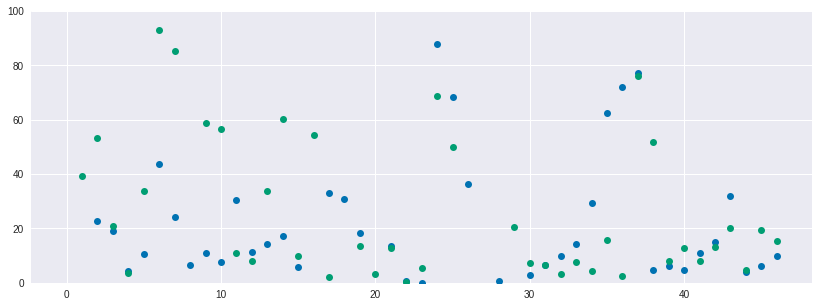

In [92]:
means = []
for day in range(1, np.max(all_dat['day']) - 1):
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day + 1) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means.append(mean)
means = np.array(means)

means_sd = [] # means same day
for day in range(1, np.max(all_dat['day']) - 1):
    before_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'morning') & (all_dat.isyb == 1))]
    after_night = all_dat[((all_dat.day == day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))]
    data = percentage_change(before_night, after_night)
    
    mean = np.mean((data['mentropy'], data['mfm'], data['mgoodness'], data['vfm'], data['ventropy'],
                    data['vgoodness']))
    means_sd.append(mean)
means_sd = np.array(means_sd)

plt.figure(figsize=(14, 5))
plt.plot(means, 'o')
plt.plot(means_sd, 'o')
plt.ylim((0, 100))

In [93]:
all_changes = []

# NIGHT

for bird_n, bird in all_dat.groupby('bird'):
    print(bird_n)
    for isyb, syllable in tutor_df.iterrows():
        print('syb:', isyb)
        beg = syllable['beg'] - 50
        end = syllable['end'] + 50
        objective = bird.query('day == {} and moment == "evening" and beg > {beg} and end < {end}'.format(bird['day'].max(), beg=beg, end=end))
        if len(objective) == 0:
            print(isyb, 'ignored')
            continue
        for day in range(bird['day'].max()):
            first = bird.query('day == {} and moment == "evening" and beg > {beg} and end < {end}'.format(day, beg=beg, end=end))
            last  = bird.query('day == {} and moment == "morning" and beg > {beg} and end < {end}'.format(day+1, beg=beg, end=end))
            if len(first) > 0 and len(last) > 0:
                sign = np.sign(last.median() - first.median()) * np.sign(objective.median() - first.median())[[
                    'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]
                #display(sign)
                percent_change_all = (sign * (((last.median() - first.median()) / first.median() * 100).abs())[[
                    'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']])
                percent_change = percent_change_all.mean()
                if abs(percent_change) > 100:
                    print(percent_change_all)
                    print(first['mfm'])
                    print(last['mfm'])
                all_changes.append({'day': day, 'isyb': isyb, 'bird': bird_n, 'percent_change':percent_change, 'cond': 'night'})
        
# DAY
if False:

    for bird_n, bird in all_dat.groupby('bird'):
        objective = bird.query('day == {}'.format(bird['day'].max()))
        for day in range(bird['day'].max()):
            first = bird.query('day == {} and moment == "morning"'.format(day))
            last  = bird.query('day == {} and moment == "evening"'.format(day))
            sign = np.sign(last.median() - first.median()) * np.sign(objective.median() - first.median())[[
                'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]
            percent_change = (sign * (((last.median() - first.median()) / first.median() * 100).abs())[[
                'mentropy', 'mfm','mgoodness','vfm','ventropy','vgoodness']]).mean()
            all_changes.append({'day': day, 'bird': bird_n, 'percent_change':percent_change, 'cond': 'day'})

0
syb: 0
beg                   NaN
bird                  NaN
comb                  NaN
day                   NaN
end                   NaN
isong                 NaN
isyb                  NaN
length                NaN
mam                   NaN
mamplitude            NaN
mentropy       161.294341
mfm           1312.099000
mgoodness      149.338744
mpitch                NaN
vam                   NaN
vamplitude            NaN
ventropy       -22.455117
vfm             54.466395
vgoodness      242.037287
vpitch                NaN
dtype: float64
143   -0.496913
144    0.137843
157   -0.318129
170   -0.022532
171    0.022510
Name: mfm, dtype: float64
186   -0.318179
198   -0.318155
212   -0.337892
Name: mfm, dtype: float64
beg                   NaN
bird                  NaN
comb                  NaN
day                   NaN
end                   NaN
isong                 NaN
isyb                  NaN
length                NaN
mam                   NaN
mamplitude            NaN
mentropy        

syb: 3
beg                  NaN
bird                 NaN
comb                 NaN
day                  NaN
end                  NaN
isong                NaN
isyb                 NaN
length               NaN
mam                  NaN
mamplitude           NaN
mentropy        8.063491
mfm           779.537145
mgoodness       3.106457
mpitch               NaN
vam                  NaN
vamplitude           NaN
ventropy       46.412528
vfm            22.207100
vgoodness      46.814553
vpitch               NaN
dtype: float64
3036   -0.088220
3037   -0.372818
3050   -0.069718
3060   -0.188419
3061    1.391415
Name: mfm, dtype: float64
3071   -0.188200
3072    1.389084
3082   -0.188190
3083    1.388966
3093   -0.188017
3094    1.386993
Name: mfm, dtype: float64
syb: 4
beg                  NaN
bird                 NaN
comb                 NaN
day                  NaN
end                  NaN
isong                NaN
isyb                 NaN
length               NaN
mam                  NaN
mamplit

beg                  NaN
bird                 NaN
comb                 NaN
day                  NaN
end                  NaN
isong                NaN
isyb                 NaN
length               NaN
mam                  NaN
mamplitude           NaN
mentropy      138.782364
mfm            66.904144
mgoodness     178.966339
mpitch               NaN
vam                  NaN
vamplitude           NaN
ventropy      142.146878
vfm            48.631839
vgoodness      47.196585
vpitch               NaN
dtype: float64
2907   -0.334865
2916    0.078532
2917   -0.334862
2928    0.135221
2929   -0.334860
Name: mfm, dtype: float64
2939    0.135389
2940   -0.334860
2949    0.078753
2950   -0.334862
2960    0.078123
2961   -0.299773
Name: mfm, dtype: float64
syb: 7
beg                  NaN
bird                 NaN
comb                 NaN
day                  NaN
end                  NaN
isong                NaN
isyb                 NaN
length               NaN
mam                  NaN
mamplitude    

In [94]:
change_df = pd.DataFrame(all_changes)
change_df = change_df.groupby(('day', 'bird', 'cond')).mean()

In [95]:
change_df = pd.DataFrame(change_df.to_records())

In [96]:
change_df

,day,bird,cond,isyb,percent_change
0,0,0,night,4.5,15.185742
1,1,0,night,4.0,-64.940200
2,2,0,night,4.0,-44.764978
3,3,0,night,4.0,-19.894466
4,4,0,night,4.0,55.215733
5,5,0,night,4.0,60.366640
6,6,0,night,4.0,7.881751
7,7,0,night,4.0,68.949339
8,8,0,night,4.0,28.553011
9,9,0,night,4.0,4.469138


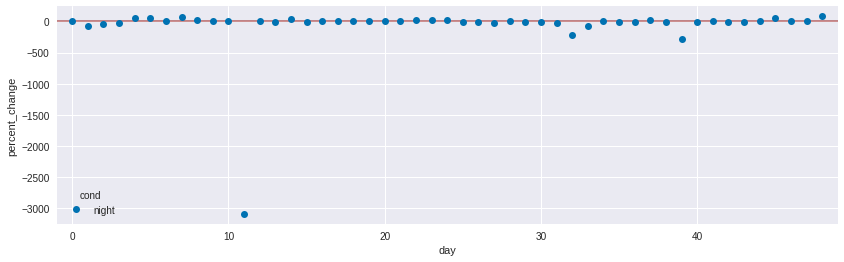

In [97]:
plt.figure(figsize=(14, 4))
plt.axhline(0, c='darkred', alpha=0.5)
sns.tsplot(change_df, time='day', unit='bird', interpolate=False, value='percent_change', condition='cond', err_style='ci_bars', ci=95, estimator=np.median)
#plt.ylim((-70, 70))

In [98]:
np.where(change_df.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [99]:
all_changes_df = pd.DataFrame(all_changes)

In [100]:
all_changes_df.query('cond == "night" and  -100 <percent_change < 100').groupby('bird').mean()['percent_change']

bird
0    1.577046
Name: percent_change, dtype: float64

In [101]:
night_pc = all_changes_df.query('cond == "night"').groupby('bird').mean()
sim = []
for i in night_pc.index:
    with open(join(main_path.format(i), 'data_cur.pkl'), 'rb') as f:
        songlog = pickle.load(f)
    root_data = [item[1] for item in songlog if item[0] == 'root']
    rd = pd.DataFrame(root_data)
    smodels = rd['songs'].iloc[-1]
    print(i, 'beg')
    sim.append(bsa.similarity(smodels[0].gen_sound(), tutor)['similarity'])
    print(i)

0 beg
0


In [102]:
night_pc['percent_change'] = -night_pc['percent_change']
night_pc['sim'] = sim

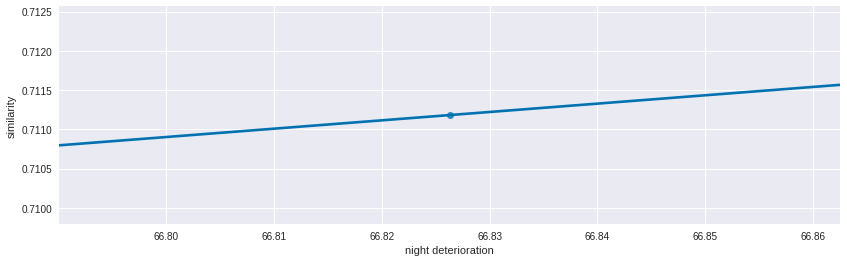

In [103]:
fig = plt.figure(figsize=(14, 4))
ax = fig.gca()
sns.regplot(x="percent_change", y='sim', data=night_pc, ax=ax)
ax.set_xlabel('night deterioration')
ax.set_ylabel('similarity')

In [104]:
night_pc

,day,isyb,percent_change,sim
bird,,,,
0,24.054545,4.009091,66.826285,0.711181
